In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

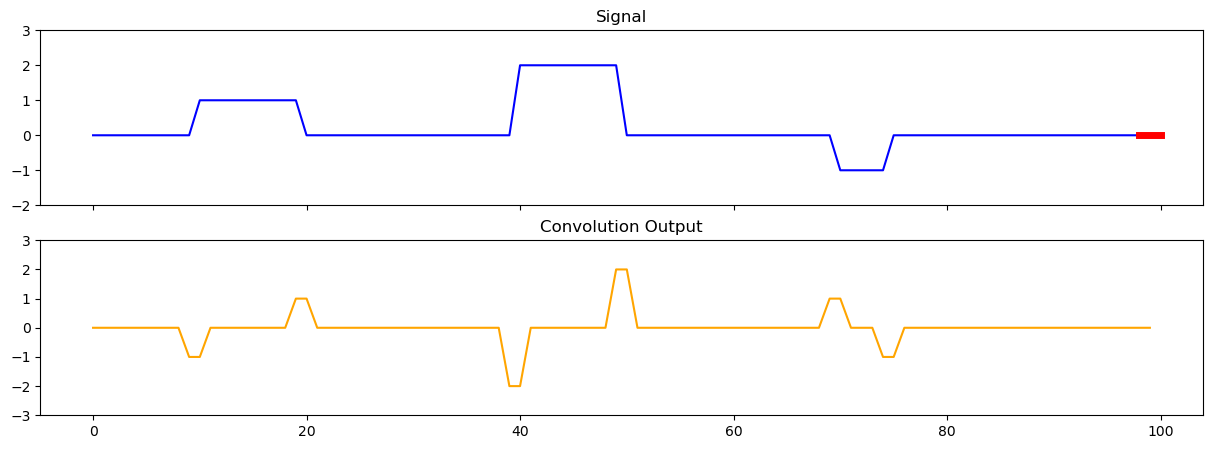

In [26]:
# Create the input signal
signal = np.zeros(100)
signal[10:20] = 1
signal[40:50] = 2
signal[70:75] = -1

# Define the convolution kernel
kernel = np.array([1, 0, -1])
k_size = len(kernel)

# Pad signal for 'valid' convolution (you can switch to 'same' or 'full' mode if needed)
pad = k_size // 2
padded_signal = np.pad(signal, (pad, pad), mode='constant', constant_values=0)
output = np.zeros_like(signal)

# Set up the plot
fig, (ax_signal, ax_output) = plt.subplots(2, 1, figsize=(15, 5), sharex=True)

ax_signal.set_title("Signal")
line_signal, = ax_signal.plot(signal, color='blue')
kernel_window, = ax_signal.plot([], [], color='red', lw=5)
kernel_box = ax_signal.fill_between([], [], [], color='red', alpha=0.2)

ax_output.set_title("Convolution Output")
line_output, = ax_output.plot(np.zeros_like(signal), color='orange')

# Formatting
ax_signal.set_ylim(signal.min() - 1, signal.max() + 1)
ax_output.set_ylim(signal.min() - 2, signal.max() + 1)

def init():
    kernel_window.set_data([], [])
    line_output.set_ydata(np.zeros_like(signal))
    return kernel_window, line_output

def update(i):
    start = i
    end = i + k_size
    if end > len(padded_signal):
        return kernel_window, line_output

    window = padded_signal[start:end]
    conv_val = np.dot(kernel, window)

    # Update kernel overlay
    x_vals = np.arange(start - pad, end - pad)
    y_vals = window
    kernel_window.set_data(x_vals, y_vals)

    # Update output value
    output[i] = conv_val
    line_output.set_ydata(output)

    return kernel_window, line_output

# Create the animation
ani = FuncAnimation(fig, update, frames=len(signal), init_func=init, blit=True, interval=100)

# Save as GIF
ani.save("conv1d_demo.gif", writer=PillowWriter(fps=10))

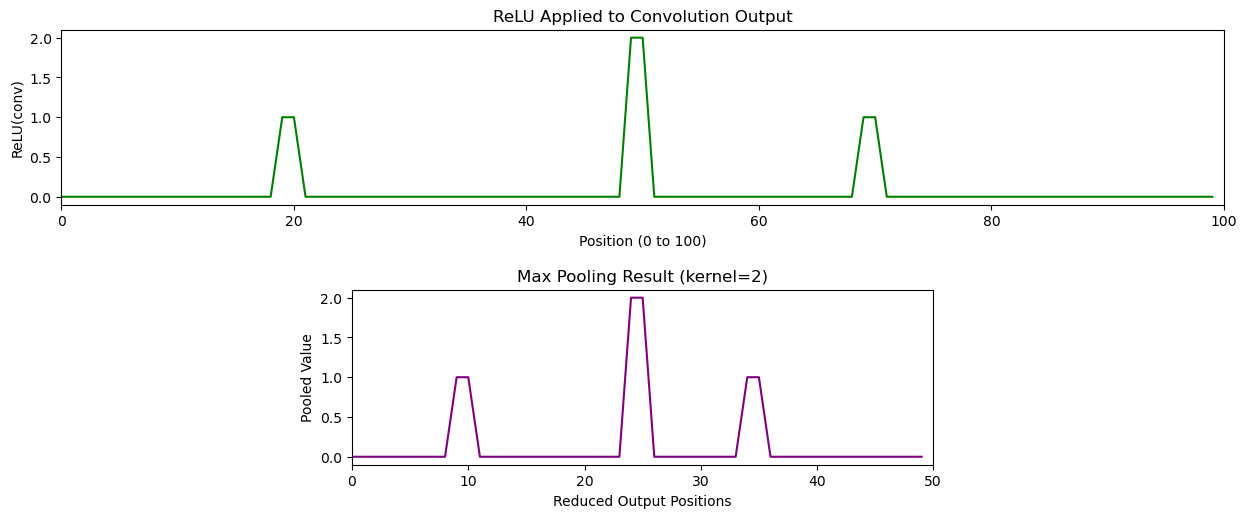

In [25]:
# ReLU and Max Pooling (in case not already defined)
def relu(x):
    return np.maximum(0, x)

def max_pool1d_np(x, kernel_size=2):
    stride = kernel_size
    L = len(x)
    out_len = (L - kernel_size) // stride + 1
    return np.array([np.max(x[i*stride : i*stride + kernel_size]) for i in range(out_len)])

# Apply operations
relu_output = relu(output)
pooled_output = max_pool1d_np(relu_output, kernel_size=2)

# X positions for pooled values (centered in their window)
pooled_x = np.arange(0, len(pooled_output))

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5), sharex=False)

# --- ReLU plot ---
ax1.set_title("ReLU Applied to Convolution Output")
ax1.plot(np.arange(len(relu_output)), relu_output, color='green')
ax1.set_xlim(0, len(relu_output))
ax1.set_ylabel("ReLU(conv)")
ax1.set_xlabel("Position (0 to 100)")

# --- Max Pooling plot ---
ax2.set_title("Max Pooling Result (kernel=2)")
ax2.plot(pooled_x, pooled_output, color='purple', linestyle='-')
ax2.set_xlim(0, 50)
ax2.set_xlabel("Reduced Output Positions")
ax2.set_ylabel("Pooled Value")

# Adjust width of ax2 to 50% of ax1
pos1 = ax1.get_position()
pos2 = ax2.get_position()

# Shrink ax2 width to 50% and align it to the center of ax1
new_width = pos1.width * 0.5
ax2.set_position([
    pos1.x0 + (pos1.width - new_width) / 2,  # center it
    pos2.y0-0.1,
    new_width,
    pos2.height
])
plt.savefig("./ReLU_pooling.png", bbox_inches='tight', dpi=200)
# plt.tight_layout()
plt.show()